In [1]:
import sqlite3
import pandas as pd
from sqlite3 import Error
import matplotlib.pyplot as plt
import datetime
import numpy as np

# Connect to the database 

In [2]:
con = sqlite3.connect("company.db")

In [3]:
df_camps = pd.read_sql_query("SELECT * from Campaigns", con)
display(df_camps.head(3))
df_camps.info()

,start_date,end_date,total_spend,country
0,2017-01-03,2017-01-04,9935.67,
1,2017-01-04,2017-01-06,17696.41,id
2,2017-01-08,2017-01-12,22541.26,in


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 4 columns):
start_date     43 non-null object
end_date       43 non-null object
total_spend    43 non-null float64
country        43 non-null object
dtypes: float64(1), object(3)
memory usage: 924.0+ bytes


In [4]:
df_client = pd.read_sql_query("SELECT * from Clients", con)
display(df_client.head(3))
df_client.info()

,account,type,residence,date_joined,indication_coupon,first_deposit_amount,first_deposit_date,first_transaction_amount,first_transaction_date,balance_amount
0,5019,type_6,ua,2018-06-18,308,9090.91,2018-06-18,NaN,None,9090.91
1,3655,type_6,ve,2017-09-04,83,9090.91,2017-09-04,0.120000,2017-09-04,-191834.62
2,2809,type_6,br,2017-01-16,308,9090.91,2017-01-16,0.205556,2017-01-16,-3679886.14


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
account                     5000 non-null int64
type                        5000 non-null object
residence                   5000 non-null object
date_joined                 5000 non-null object
indication_coupon           5000 non-null int64
first_deposit_amount        3959 non-null float64
first_deposit_date          3964 non-null object
first_transaction_amount    2606 non-null float64
first_transaction_date      2608 non-null object
balance_amount              3964 non-null float64
dtypes: float64(3), int64(2), object(5)
memory usage: 293.0+ KB


In [5]:
df_tran = pd.read_sql_query("SELECT * from Transactions", con)
display(df_tran)
df_tran.info()

,transaction_date,account,total_buy,total_sell,total_deposits,total_withdrawals,count_contracts,count_deposits,count_withdrawals
0,2018-05-25,1093,NaN,NaN,NaN,3.15,0,0,1
1,2017-03-18,1093,7.50,6.50,100.0,NaN,72,1,0
2,2017-03-17,1093,48.63,38.51,1000.0,NaN,93,2,0
3,2018-12-10,2622,36.29,32.99,NaN,NaN,44,0,0
4,2018-12-09,2622,101.19,102.56,NaN,NaN,76,0,0
...,...,...,...,...,...,...,...,...,...
36742,2017-12-19,5996,NaN,NaN,100000.0,NaN,0,1,0
36743,2018-02-01,5997,NaN,NaN,100000.0,NaN,0,1,0
36744,2018-03-26,5998,13774.37,10881.00,100000.0,NaN,2,1,0
36745,2018-04-13,5999,21863.37,22540.64,NaN,NaN,3,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36747 entries, 0 to 36746
Data columns (total 9 columns):
transaction_date     36747 non-null object
account              36747 non-null int64
total_buy            33169 non-null float64
total_sell           32921 non-null float64
total_deposits       8242 non-null float64
total_withdrawals    16685 non-null float64
count_contracts      36747 non-null int64
count_deposits       36747 non-null int64
count_withdrawals    36747 non-null int64
dtypes: float64(4), int64(4), object(1)
memory usage: 2.4+ MB


# Pre-processing

### Pre-process clients table

Prepocessing the client's table involved:
1. Replacing the ' ' values in the 'residence' column to 'unknown'
2. Replacing the missing (NAN) 'amount' values with 0
3. Changing the type of dates to 'DATETIME'

In [6]:
df_client.describe()

,account,indication_coupon,first_deposit_amount,first_transaction_amount,balance_amount
count,5000.000000,5000.000000,3959.000000,2606.000000,3.964000e+03
mean,3499.500000,280.059000,7972.617336,62.299371,-3.614863e+05
std,1443.520003,72.958655,5898.371677,296.155525,1.812420e+06
min,1000.000000,0.000000,1.390000,0.070000,-2.905925e+07
25%,2249.750000,308.000000,9090.910000,0.520000,-9.090909e+04
50%,3499.500000,308.000000,9090.910000,1.550000,1.964535e+03
75%,4749.250000,308.000000,9090.910000,9.089630,9.090910e+03
max,5999.000000,308.000000,100000.000000,6887.185000,3.551842e+05


In [7]:
df_client.residence.replace([''],['unknown'], inplace = True)

In [8]:
null_clients = df_client[df_client['first_deposit_amount'].isna()]
print('Total clients which do not contribute to the platform:', len(null_clients))
print('% of clients which do not contribute to the platform', len(null_clients) / len(df_client) * 100)

Total clients which do not contribute to the platform: 1041
% of clients which do not contribute to the platform 20.82


In [9]:
df_client['first_deposit_amount'].fillna(0,inplace=True)
df_client['first_transaction_amount'].fillna(0,inplace=True)
df_client['balance_amount'].fillna(0,inplace=True)

In [10]:
df_client.isna().sum()

account                        0
type                           0
residence                      0
date_joined                    0
indication_coupon              0
first_deposit_amount           0
first_deposit_date          1036
first_transaction_amount       0
first_transaction_date      2392
balance_amount                 0
dtype: int64

In [11]:
df_client['first_deposit_date'] = pd.to_datetime(df_client['first_deposit_date'])
df_client['first_transaction_date'] = pd.to_datetime(df_client['first_transaction_date'])
df_client['date_joined'] = pd.to_datetime(df_client['date_joined'])

In [12]:
df_client['residence'].nunique()

137

In [13]:
most_clients = df_client['residence'].value_counts()
most_clients.nlargest(10)

id         1667
br          438
unknown     302
ng          284
ru          274
vn          170
in          141
gb          134
za          105
lk           97
Name: residence, dtype: int64

In [14]:
df_client['indication_coupon'].value_counts().nlargest()

308    4229
41       61
116      48
36       20
181      18
Name: indication_coupon, dtype: int64

### Pre-process campaigns table 

Preprocessing of campaigns table involved:
1. Changing the type of dates to 'DATETIME'
2. Calculating the number of days a campaign took place and storing it in a new column

In [15]:
df_camps.describe()

,total_spend
count,43.000000
mean,12004.853023
std,6862.693494
min,745.890000
25%,7499.460000
50%,12463.880000
75%,16249.620000
max,29866.080000


In [16]:
df_camps['start_date'] = pd.to_datetime(df_camps['start_date'])
df_camps['end_date'] = pd.to_datetime(df_camps['end_date'])

In [17]:
df_camps['no_of_days'] = df_camps['end_date'] - df_camps['start_date']

In [18]:
df_camps.country.replace([''],['global'], inplace = True)

In [19]:
df_camps

,start_date,end_date,total_spend,country,no_of_days
0,2017-01-03,2017-01-04,9935.67,global,1 days
1,2017-01-04,2017-01-06,17696.41,id,2 days
2,2017-01-08,2017-01-12,22541.26,in,4 days
3,2017-02-13,2017-02-18,745.89,ng,5 days
4,2017-05-02,2017-05-03,15338.78,id,1 days
5,2017-05-20,2017-05-23,7976.25,gh,3 days
6,2017-05-25,2017-05-28,7102.54,ru,3 days
7,2017-06-20,2017-06-20,14269.43,id,0 days
8,2017-06-26,2017-06-30,3140.96,ru,4 days
9,2017-06-28,2017-06-28,9909.73,ua,0 days


In [20]:
df_camps['country'].nunique()

19

In [21]:
df_camps['no_of_days'].value_counts()

2 days    15
4 days     9
3 days     7
1 days     6
0 days     5
5 days     1
Name: no_of_days, dtype: int64

In [22]:
df_camps['no_of_days'].mean()

Timedelta('2 days 06:41:51.627906')

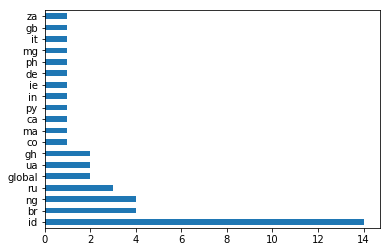

In [23]:
df_camps.country.value_counts().plot(kind='barh')

### Pre-process transactions table

Preprocessing of transactions table involved:
1. Changing the type of dates to 'DATETIME'
2. Replacing the missing (NAN) 'amount' values with 0

In [24]:
df_tran.describe()

,account,total_buy,total_sell,total_deposits,total_withdrawals,count_contracts,count_deposits,count_withdrawals
count,36747.000000,33169.000000,32921.000000,8242.00000,16685.000000,36747.000000,36747.000000,36747.000000
mean,3098.360927,2327.151810,1807.789838,6860.93906,88211.235859,255.985468,0.292786,0.084850
std,1361.246105,10855.111743,8532.686975,9210.63811,31763.767680,4529.950176,0.707798,0.524256
min,1001.000000,0.070000,0.030000,1.30000,0.200000,0.000000,0.000000,0.000000
25%,1873.500000,4.500000,3.860000,350.00000,100000.000000,3.000000,0.000000,0.000000
50%,3153.000000,28.190000,23.920000,9090.91000,100000.000000,15.000000,0.000000,0.000000
75%,4052.500000,259.170000,217.180000,9090.91000,100000.000000,68.000000,0.000000,0.000000
max,5999.000000,100000.000000,100000.000000,100000.00000,100000.000000,248789.000000,17.000000,33.000000


In [25]:
print('Total clients who have ever made a transaction:', df_tran['account'].nunique())

Total clients who have ever made a transaction: 3964


In [26]:
df_tran['transaction_date'] = pd.to_datetime(df_tran['transaction_date'])

In [27]:
df_tran['total_buy'].fillna(0,inplace=True)
df_tran['total_sell'].fillna(0,inplace=True)
df_tran['total_deposits'].fillna(0,inplace=True)
df_tran['total_withdrawals'].fillna(0,inplace=True)

In [28]:
# Buy, sell, deposits, withdrawals are all considered as transactions
df_tran[df_tran['total_buy'].isna()]

,transaction_date,account,total_buy,total_sell,total_deposits,total_withdrawals,count_contracts,count_deposits,count_withdrawals


# 1. Performance of past campaigns

The performance of past campaigns can be analysed in a few possible ways:
1.	May be aimed to increase the number of clients on the website (awareness)
2.	Or it may aim to increase the profit generated
3.	Or maybe both of the above

The effectiveness of these campaigns can be determined by comparing the results before and after the campaigns


### 1.0 Number of accounts

In [29]:
display(df_client.head(2))
display(df_camps.head(2))

,account,type,residence,date_joined,indication_coupon,first_deposit_amount,first_deposit_date,first_transaction_amount,first_transaction_date,balance_amount
0,5019,type_6,ua,2018-06-18,308,9090.91,2018-06-18,0.00,NaT,9090.91
1,3655,type_6,ve,2017-09-04,83,9090.91,2017-09-04,0.12,2017-09-04,-191834.62


,start_date,end_date,total_spend,country,no_of_days
0,2017-01-03,2017-01-04,9935.67,global,1 days
1,2017-01-04,2017-01-06,17696.41,id,2 days


In [30]:
#group the by date and residence and count the number of accounts
df_client = df_client.sort_values('date_joined', ascending=True)
df_client_count = df_client.groupby(['date_joined', 'residence']).agg({'account':'count'}).reset_index()
df_client_count['date_joined'] = pd.to_datetime(df_client_count['date_joined'])
df_client_count.head(2)

,date_joined,residence,account
0,2017-01-01,br,1
1,2017-01-01,gb,1


In [31]:
camp_starts = df_camps['start_date'].tolist()
camp_ends = df_camps['end_date'].tolist()
countries = df_camps['country'].tolist()

before_total_count = []
acc_count_increase = []

# Runs quite quickly as there are only 43 campaigns, O(n) best case = worst case, n is the number of campaigns
for start_date, end_date, country in zip(camp_starts, camp_ends, countries):
    before_total_count.append(df_client_count[(df_client_count['date_joined'] < pd.to_datetime(start_date)) & ((df_client_count['residence'] == country))]['account'].sum())
    # accounts that increased during a campaign
    temp_df = df_client_count[(df_client_count['date_joined'] >= pd.to_datetime(start_date)) & (df_client_count['date_joined'] <= pd.to_datetime(end_date)) & (df_client_count['residence'] == country)]
    acc_count_increase.append(temp_df['account'].sum())

In [32]:
# Note, all these column values are specific based on country
df_camps['no_accounts_before'] = before_total_count
df_camps['no_accounts_increase'] = acc_count_increase
df_camps['no_accounts_after'] = df_camps['no_accounts_before'] + df_camps['no_accounts_increase']

In [33]:
df_camp_client = df_camps.copy()

In [34]:
df_camp_client

,start_date,end_date,total_spend,country,no_of_days,no_accounts_before,no_accounts_increase,no_accounts_after
0,2017-01-03,2017-01-04,9935.67,global,1 days,0,0,0
1,2017-01-04,2017-01-06,17696.41,id,2 days,3,3,6
2,2017-01-08,2017-01-12,22541.26,in,4 days,1,0,1
3,2017-02-13,2017-02-18,745.89,ng,5 days,11,2,13
4,2017-05-02,2017-05-03,15338.78,id,1 days,257,3,260
5,2017-05-20,2017-05-23,7976.25,gh,3 days,1,0,1
6,2017-05-25,2017-05-28,7102.54,ru,3 days,62,1,63
7,2017-06-20,2017-06-20,14269.43,id,0 days,344,1,345
8,2017-06-26,2017-06-30,3140.96,ru,4 days,68,1,69
9,2017-06-28,2017-06-28,9909.73,ua,0 days,15,0,15


In [35]:
print('during campaigns ', df_camp_client['no_accounts_increase'].sum(), 'new clients registered')

during campaigns  145 new clients registered


In [36]:
print('So from 5000 accounts that the website has, only ',(df_camp_client['no_accounts_increase'].sum()/5000)*100, '% are through campaigns')

So from 5000 accounts that the website has, only  2.9000000000000004 % are through campaigns


In [37]:
df_camp_clients_by_country = df_camp_client.groupby('country').agg({'no_accounts_increase':'sum'}).reset_index()
df_camp_clients_by_country.nlargest(6,'no_accounts_increase')

,country,no_accounts_increase
7,id,124
0,br,12
16,ru,5
13,ng,4
1,ca,0
2,co,0


Conclusion: maybe these campaigns werent intended to increase the number of clients because only 145 new clients joined. Maybe this campaign was to increase the profit generated.

### Does the number of days a campaign last, affect the number of clients that joined?

In [38]:
# Doing this because type = timedelta cannot be used in correlation function as it is not a numeric value
# you can access timedelta days by using .days, this code below converts it to numeric days and sets it back to the column
df_camp_client['no_of_days'] = df_camp_client['no_of_days'].apply(lambda x: x.days)

In [39]:
df_camp_client['no_of_days'].corr(df_camp_client['no_accounts_increase'])

0.22714525691863602

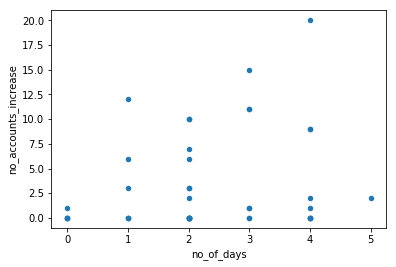

In [40]:
# Reflects the 0.22 pos correlation, so no real significant pattern can be seen
df_camp_client.plot.scatter(x='no_of_days', y='no_accounts_increase');

The visualisation above shows that the no of days a campaign lasts does not really have an impact in the number of accounts increase

In [41]:
df_client['indication_coupon'].corr(df_camp_client['no_accounts_increase'])

-0.016020241840569664

# 2.  Profit

### 2.1 Total Profit

To calculate the total profit earned globally:
1. Revenue was calculated
2. 1% of that amount was taken into consideration
3. The total amount of money spent on campaigns (expenditure) was subtracted from the revenue and that's the profit

The total profit the company earned the whole year was 255684.30

#### The total revenue generated in the whole year:

In [42]:
totalbought = df_tran['total_buy'].sum()
totalbought

77189298.38

#### The company makes a profit by selling the data by roughly 1% of the total clients that have bought an item

In [43]:
onePercent = (totalbought/100)*1
onePercent

771892.9837999999

#### But we also have to account in for the total amount of expenditure (In our case, it's the amount of money spent on campaigns)

In [44]:
year_campaign_spend = df_camps['total_spend'].sum()
year_campaign_spend

516208.68

#### Final profit

In [45]:
profit = onePercent - year_campaign_spend
profit

255684.30379999994

### 2.2  Profit by countries 

To calculate the profit earned per country:
1. The transactions table was joined with the clients table
2. The revenue was totalled based on the country
3. 1% of that amount was taken into consideration
4. The countries that had campaigns in them, their spending was subtracted from that 1% and thats the profit the country made

In [46]:
df_tran.head(2)

,transaction_date,account,total_buy,total_sell,total_deposits,total_withdrawals,count_contracts,count_deposits,count_withdrawals
0,2018-05-25,1093,0.0,0.0,0.0,3.15,0,0,1
1,2017-03-18,1093,7.5,6.5,100.0,0.00,72,1,0


In [47]:
df_client.head(2)

,account,type,residence,date_joined,indication_coupon,first_deposit_amount,first_deposit_date,first_transaction_amount,first_transaction_date,balance_amount
1097,2755,type_6,it,2017-01-01,308,9090.91,2017-01-01,0.000,NaT,-90909.09
1673,1001,type_1,vn,2017-01-01,308,110.00,2017-01-04,0.191,2017-01-04,104.18


In [48]:
df_tran_client = pd.merge(left=df_tran,right=df_client, how='left', left_on='account', right_on='account')

df_tran_client.head(2)

,transaction_date,account,total_buy,total_sell,total_deposits,total_withdrawals,count_contracts,count_deposits,count_withdrawals,type,residence,date_joined,indication_coupon,first_deposit_amount,first_deposit_date,first_transaction_amount,first_transaction_date,balance_amount
0,2018-05-25,1093,0.0,0.0,0.0,3.15,0,0,1,type_1,ru,2017-03-17,13,500.0,2017-03-17,0.522903,2017-03-17,1085.73
1,2017-03-18,1093,7.5,6.5,100.0,0.00,72,1,0,type_1,ru,2017-03-17,13,500.0,2017-03-17,0.522903,2017-03-17,1085.73


In [49]:
df_tran_client.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36747 entries, 0 to 36746
Data columns (total 18 columns):
transaction_date            36747 non-null datetime64[ns]
account                     36747 non-null int64
total_buy                   36747 non-null float64
total_sell                  36747 non-null float64
total_deposits              36747 non-null float64
total_withdrawals           36747 non-null float64
count_contracts             36747 non-null int64
count_deposits              36747 non-null int64
count_withdrawals           36747 non-null int64
type                        36747 non-null object
residence                   36747 non-null object
date_joined                 36747 non-null datetime64[ns]
indication_coupon           36747 non-null int64
first_deposit_amount        36747 non-null float64
first_deposit_date          36743 non-null datetime64[ns]
first_transaction_amount    36747 non-null float64
first_transaction_date      35212 non-null datetime64[ns]
balance_

In [50]:
df_client['residence'].nunique()

137

In [51]:
len(df_tran_client['residence'].unique())

130

In [52]:
revenue = df_tran_client.groupby(['residence']).total_buy.sum()
revenue.nlargest()

residence
id    48342021.31
ng     3640249.68
br     3074899.40
gb     2440897.59
vn     2234566.03
Name: total_buy, dtype: float64

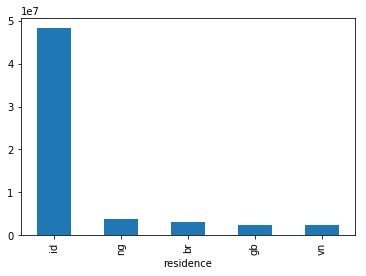

In [53]:
revenue.nlargest().plot(kind='bar')

In [54]:
camp_spend_country = df_camps.groupby(['country']).total_spend.sum()
camp_spend_country.nlargest()

country
id    184919.92
br     47229.13
ru     40109.58
ng     35351.00
ua     27302.04
Name: total_spend, dtype: float64

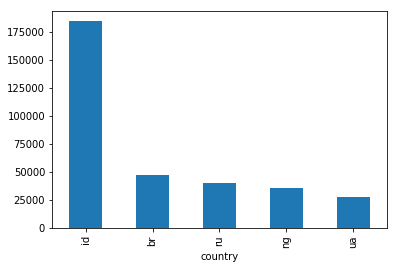

In [55]:
camp_spend_country.nlargest().plot(kind='bar')

In [56]:
onePercent_country = revenue.apply(lambda x : (x/100)*1)
profit_per_country = onePercent_country.sub(camp_spend_country, fill_value=0)
print(profit_per_country.sort_values(ascending = False))

id        298500.2931
vn         22345.6603
pk         13707.4353
gb          7454.7659
bo          7086.3447
             ...     
py        -16661.9300
ru        -17786.4281
ph        -18128.4879
ua        -18640.0010
global    -25001.3500
Length: 131, dtype: float64


In [57]:
pd.DataFrame(profit_per_country)

,0
ae,115.1146
af,2844.5249
ag,1.5881
al,0.0109
am,4.5851
...,...
ve,414.9614
vn,22345.6603
za,1566.1388
zm,120.7230


In [58]:
profit_per_country.nlargest(10)

id    298500.2931
vn     22345.6603
pk     13707.4353
gb      7454.7659
bo      7086.3447
eg      7010.3226
nl      5248.7222
bn      4028.7114
gh      3934.3344
lk      3725.7904
dtype: float64

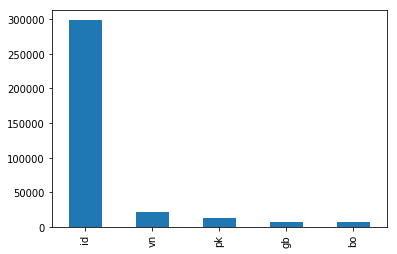

In [59]:
profit_per_country.nlargest().plot(kind='bar')

However, not all countries made a profit. The visualisation below shows the top 5 countries that went through a loss:

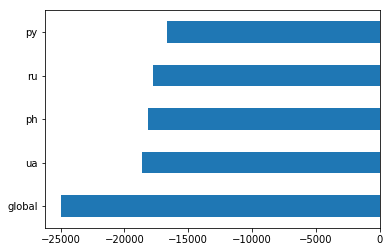

In [60]:
profit_per_country.nsmallest(n=5).plot(kind='barh')

We can determine a few things from both the profit and loss visualisations. A few things to note here is that:
1. Indonesia has had the most campaigns, about 14 of them so there seems to be a positive correlation between the number of campaigns and profit earned
2. Besides Indonesia, only United Kingdom had a campaign in their country from the countries that earned a profit even though their campaign was just for a day. The profit earned may be due to their powerful currency
3. Eventhough the company has made an overall profit of 255684.30 (as seen earlier), it has incurred a few losses in a few countries
4. Amongst the top 10 countries that made a profit, most were in the Asian region (5/10), 2 of them in Europe, 2 of them in Africa and 1 in South America

In [61]:
df_tran_client['indication_coupon'].corr(df_tran_client['total_buy'])

0.019419082586086333